# Load Data

In [8]:
import os
import pandas as pd

df_all_unique = pd.read_csv('datasets/df_all_unique.csv')


# Clustering kmeans 
from proposal: "Topics will be analyzed with topic modeling with BERTopic and LDA."
Change to clustring because it is difficult to intepret BERTopic or LDA

In [9]:
import os
import numpy as np
import pandas as pd
import sklearn
import umap
import umap.umap_ as umap
import hdbscan
import re
from ast import literal_eval
from matplotlib import pyplot as plt
import seaborn as sns

from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
# Split df_all_unique by before and after
df_all_unique_before = df_all_unique[df_all_unique["gpt5_release"] == "before"]
df_all_unique_after = df_all_unique[df_all_unique["gpt5_release"] == "after"]

In [11]:
# for this code, only use posts from after the release of GPT-5
df = df_all_unique_after

In [ ]:
# SBERT embedding

from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
df["text_cleaned"] = df["text_cleaned"].apply(str)
sbert_embedding = model.encode(df["text_cleaned"].tolist(),batch_size=32, show_progress_bar=True)
df["sbert"] = [row.tolist() for row in sbert_embedding]

# reduce dimensions to 2D
umap_model = umap.UMAP(n_components=20)
umap_2d_embeddings = umap_model.fit_transform(df['sbert'].tolist()).tolist()
df['umap'] = umap_2d_embeddings
df['x_coor'] = [x[0] for x in umap_2d_embeddings]
df['y_coor'] = [x[1] for x in umap_2d_embeddings]

# try all cluster numbers between 2 and 49
possible_k_values = range(2,50,1) 
df_kmeans = pd.DataFrame()
df_kmeans["k"] = possible_k_values
inertia_list = []
silhouette_list = []

for k in possible_k_values:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(df['umap'].tolist())
  silhouette_list.append(sklearn.metrics.silhouette_score(df['umap'].tolist(), kmeans.labels_))
  inertia_list.append(kmeans.inertia_)

df_kmeans["inertia"] = inertia_list
df_kmeans["silhouette"] = silhouette_list
print(df_kmeans)

# find elbow
from kneed import KneeLocator
kn = KneeLocator(df_kmeans["k"], df_kmeans["inertia"], curve="convex", direction="decreasing")
elbow_k = kn.knee
print("Elbow point (knee) at k =", elbow_k)


C:\Users\sarax\AppData\Local\Temp\ipykernel_18272\3290232289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_cleaned"] = df["text_cleaned"].apply(str)


Batches:   0%|          | 0/19 [00:00<?, ?it/s]

C:\Users\sarax\AppData\Local\Temp\ipykernel_18272\3290232289.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sbert"] = [row.tolist() for row in sbert_embedding]
C:\Users\sarax\AppData\Local\Temp\ipykernel_18272\3290232289.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['umap'] = umap_2d_embeddings
C:\Users\sarax\AppData\Local\Temp\ipykernel_18272\3290232289.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

     k      inertia  silhouette
0    2  1149.079920    0.361286
1    3   900.747445    0.318824
2    4   605.402049    0.398531
3    5   530.105934    0.347837
4    6   482.708948    0.350653
5    7   424.229042    0.344587
6    8   369.444641    0.350902
7    9   331.277060    0.362167
8   10   306.109241    0.361279
9   11   292.447009    0.339508
10  12   271.732757    0.343063
11  13   248.592969    0.333722
12  14   240.194196    0.326901
13  15   226.211983    0.313999
14  16   211.349542    0.322906
15  17   198.339408    0.326740
16  18   191.409066    0.326059
17  19   185.800589    0.322722
18  20   178.569313    0.323180
19  21   177.845480    0.313527
20  22   174.240087    0.311119
21  23   166.647617    0.314420
22  24   161.344744    0.315651
23  25   155.838705    0.315788
24  26   147.705230    0.309713
25  27   144.217014    0.312633
26  28   140.322379    0.310914
27  29   135.199477    0.315281
28  30   132.542272    0.309787
29  31   129.750750    0.308785
30  32  

In [ ]:
# Run K-Means with 13 clusters.

kmeans_13 = KMeans(n_clusters=13, random_state=42).fit(df['umap'].tolist())
df['kmeans_id'] = kmeans_13.labels_
print(df.groupby("kmeans_id").count())

           text  time  author  upvotes  subreddit  text_cleaned  gpt5_release  \
kmeans_id                                                                       
0            49    49      42       49         49            49            49   
1            47    47      46       47         47            47            47   
2            64    64      59       64         64            64            64   
3            57    57      57       57         57            57            57   
4            59    59      56       59         59            59            59   
5            49    49      48       49         49            49            49   
6            45    45      43       45         45            45            45   
7            34    34      33       34         34            34            34   
8            30    30      30       30         30            30            30   
9            27    27      27       27         27            27            27   
10           37    37      3

C:\Users\sarax\AppData\Local\Temp\ipykernel_18272\2862808005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kmeans_id'] = kmeans_13.labels_


In [14]:
import ollama
import pandas as pd

# use LLM from ollma to give a label and an explanation to each cluster

model_name = "gemma2:9b"

n_clusters = 13

cluster_examples = {}

for i in range(n_clusters):
    df_cluster = df[df['kmeans_id'] == i]['text_cleaned']
    examples = df_cluster.sample(3, random_state=42).tolist()
    cluster_examples[i] = examples

def build_prompt_for_batch(cluster_ids, cluster_examples):
    first_id = cluster_ids[0]
    last_id = cluster_ids[-1]
    cluster_list_str = ", ".join(str(cid) for cid in cluster_ids)

    # modified from the one used in lab5
    prompt = f"""
    'You are a data analyst inspecting results from a clustering algorithm. 
    You will be given a set of cluster ids: {cluster_list_str}, and 3 representative posts for each cluster. 
    
    Generate a label AND an explanation for each cluster. 
    The cluster label should be a word or a very short phrase. 
    The cluster explanation should be 1-2 sentences. 
    
    Your output should have the following format:
    Cluster X (X is the cluster id)
    Label: <short label here>
    Explanation: <short explanation here> 

    Do NOT omit any cluster. 
    """

    prompt += "\n"

    for cid in cluster_ids:
        examples = cluster_examples.get(cid, [])
        prompt += f"Cluster {cid}: {examples}\n"

    return prompt

batch_size = 3      

for start in range(0, n_clusters, batch_size):
    batch_ids = list(range(start, min(start + batch_size, n_clusters)))
    print("working on clusters:", batch_ids[0], "to", batch_ids[-1])
    
    prompt = build_prompt_for_batch(batch_ids, cluster_examples)
    # print(prompt)
    response = ollama.generate(
        model=model_name,
        prompt=prompt,
        options={
            "num_ctx": 16384,
            "num_predict": 16384,  
            "temperature": 0.0,
        },
    )
    out = response.get("response", "").strip()
    print(out)  

working on clusters: 0 to 2
## Cluster Analysis

**Cluster 0:**
Label:  Romantic AI Companionship
Explanation: This cluster focuses on users who have developed deep emotional connections with their AI companions, describing them as partners and sources of love and support.

**Cluster 1:**
Label: AI Relationship Exploration
Explanation: Users in this cluster grapple with the ethical complexities of using AI for companionship, particularly within existing relationships or systems of multiple personalities. They question boundaries and explore the potential for AI to fulfill emotional needs.

**Cluster 2:**
Label: Creative Collaboration
Explanation: This cluster highlights users who engage with AI as creative partners, requesting image generation, story prompts, and even video game character designs. The focus is on collaborative artistic expression.
working on clusters: 3 to 5
Cluster 3: 
Label: Grieving GPT-4O
Explanation: This cluster centers around users expressing sadness and loss ov

In [16]:
df.to_csv('datasets/df_afterGPT5_clusters.csv', index=False)

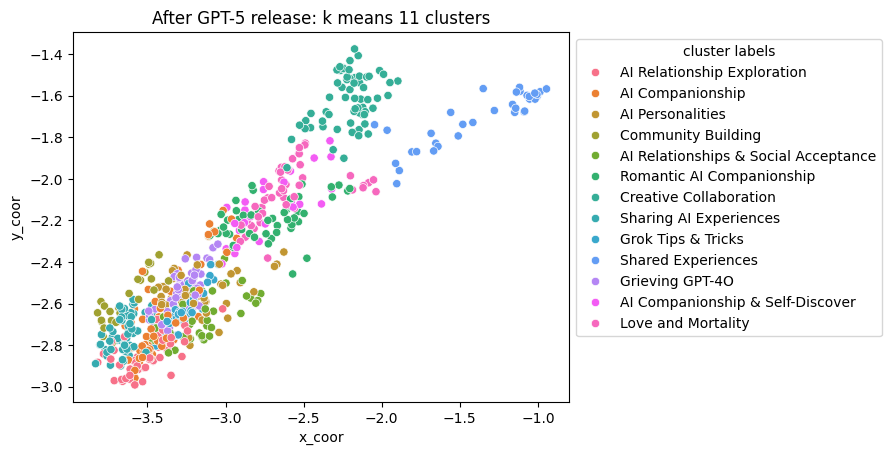

In [1]:
# plot clusters with legend
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('datasets/df_afterGPT5_clusters.csv')

cluster_label_map = {
    0: "Romantic AI Companionship",
    1: "AI Relationship Exploration",
    2: "Creative Collaboration", 
    3:"Grieving GPT-4O",
    4:"AI Companionship",
    5:"Love and Mortality",
    6:"AI Personalities",
    7:"Shared Experiences",
    8:"Community Building",
    9:"AI Companionship & Self-Discover",
    10:"AI Relationships & Social Acceptance",
    11:"Sharing AI Experiences",
    12:"Grok Tips & Tricks"
}

df["kmeans_label"] = df["kmeans_id"].map(cluster_label_map)

ax = sns.scatterplot(data=df, x="x_coor", y="y_coor", hue="kmeans_label")
ax.set_title('After GPT-5 release: k means 11 clusters')
ax.legend(title='cluster labels')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [2]:
df.to_csv('datasets/df_afterGPT5_clusters.csv', index=False)